In [173]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'/content/movies.csv')

In [174]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


> Missing Value

In [175]:
# We need to see if we have any missing data
# calculate the percentage of missing values in each column
percent_missing = df.isnull().mean() * 100
print(percent_missing)

name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64


In [176]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [177]:
#drop missing in all columns value except budget
df.dropna(subset=['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'gross', 'company',
       'runtime'], inplace=True)

In [178]:
# check that nan value droped
df.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      1991
gross          0
company        0
runtime        0
dtype: int64

In [179]:
# check the data type of each column
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [180]:
# # change the data type of columns
# df.budget=df.budget.astype("int64")
# df.gross=df.gross.astype("int64")

> let's saw what we will do in released column
* let's check if the year in released column and year column.
* if it is the same we will remain it.
* if it different we will replace the year in yea columnyear column with the year in released column.

In [181]:
# compere the year in released column and year column
df[['released','year']]

,released,year
0,"June 13, 1980 (United States)",1980
1,"July 2, 1980 (United States)",1980
2,"June 20, 1980 (United States)",1980
3,"July 2, 1980 (United States)",1980
4,"July 25, 1980 (United States)",1980
...,...,...
7651,"February 21, 2020 (United States)",2020
7652,"August 28, 2020 (United States)",2020
7653,"April 17, 2020 (Mexico)",2020
7656,"June 3, 2020 (United States)",2020


In [182]:
# this code will extract the year from released column and put it in data frame
#.extract(pat = '([0-9]{4})'): This extracts the year from the column using a regular expression pattern that matches any four-digit sequence. 
#The pattern is enclosed in parentheses to capture the year as a group.
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df[['yearcorrect']]

,yearcorrect
0,1980
1,1980
2,1980
3,1980
4,1980
...,...
7651,2020
7652,2020
7653,2020
7656,2020


In [183]:
# let's compare between year in two columns
df['year'].equals(df['yearcorrect'])

False

In [184]:
# two columns are different so we will replace the year in yea columnyear column with the year 
# to know different row we can use this code
diff_rows = df[['year','yearcorrect']].loc[df['year'] != df['yearcorrect']]
diff_rows.head()

,year,yearcorrect
8,1980,1981
11,1980,1984
21,1980,1981
33,1980,1981
40,1980,1981


In [185]:
# final we will drop the year column
df.drop(['year'], axis=1, inplace=True)

> sorting the movies by gross income they generated

In [186]:
# to show all rows
# pd.set_option("display.max_rows",None)
# sorting the movies by gross income they generated
df = df.sort_values(by= "budget", ascending= False)
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000.0,1.332699e+09,Walt Disney Pictures,152.0,2017
7066,Justice League,PG-13,Action,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0,2017
5060,Pirates of the Caribbean: at World's End,PG-13,Action,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000.0,9.609965e+08,Walt Disney Pictures,169.0,2007


> Drop duplicate
* https://www.statology.org/pandas-find-duplicates/

In [187]:
# check for duplicates in data
df[df.duplicated()]

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect


In [188]:
df.drop_duplicates()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000.0,1.332699e+09,Walt Disney Pictures,152.0,2017
7066,Justice League,PG-13,Action,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0,2017
5060,Pirates of the Caribbean: at World's End,PG-13,Action,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000.0,9.609965e+08,Walt Disney Pictures,169.0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7644,Wonder Woman 1984,PG-13,Action,"December 25, 2020 (United States)",5.4,217000.0,Patty Jenkins,Patty Jenkins,Gal Gadot,United States,NaN,1.665340e+08,Atlas Entertainment,151.0,2020
7647,Onward,PG,Animation,"March 6, 2020 (United States)",7.4,120000.0,Dan Scanlon,Dan Scanlon,Tom Holland,United States,NaN,1.419506e+08,Walt Disney Pictures,102.0,2020
7653,The Quarry,R,Crime,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,NaN,3.661000e+03,Prowess Pictures,98.0,2020
7656,Tulsa,PG-13,Comedy,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,NaN,4.133780e+05,Pryor Entertainment,120.0,2020


In [189]:
df['company'].unique()

array(['Marvel Studios', 'Walt Disney Pictures', 'Warner Bros.', ...,
       'Cactus Blue Entertainment', 'Prowess Pictures',
       'Pryor Entertainment'], dtype=object)

> my guess
  * Budget high correlated
  * company high correlated
> let's see

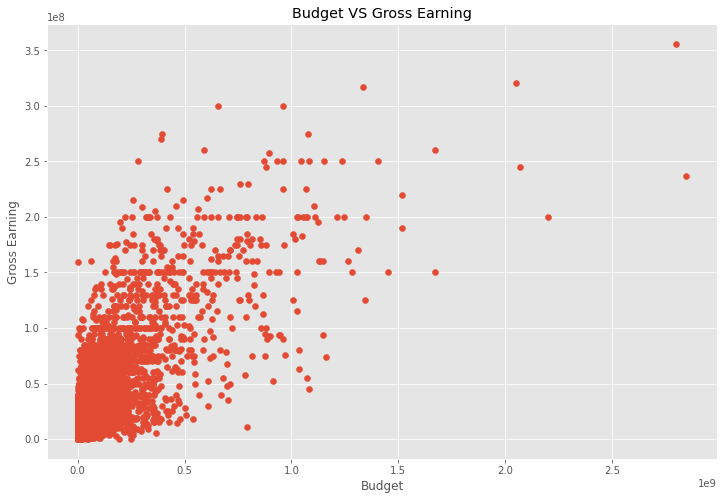

In [190]:
# scatter plot with budget and gross
plt.scatter(df.gross, df.budget)
plt.title('Budget VS Gross Earning')
plt.xlabel("Budget")
plt.ylabel("Gross Earning")
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

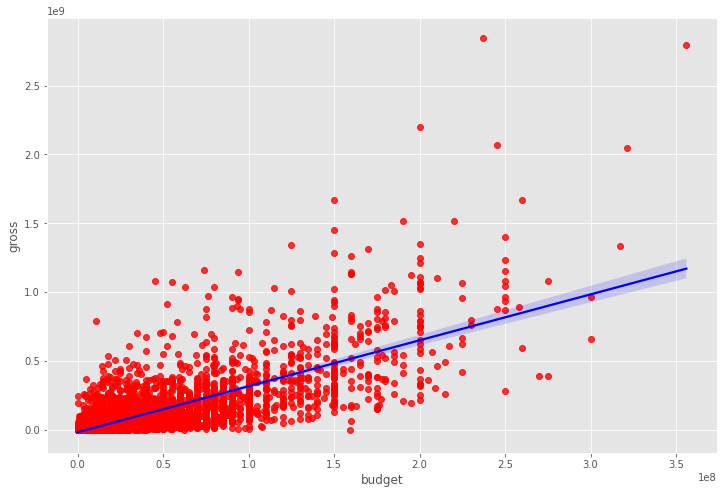

In [191]:
# Budget VS Gross Earning using seaborn

# sns.regplot(x="gross", y='budget', data = df)

sns.regplot(x="budget", y='gross', data = df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [192]:
# So far we know that there is a correlation, but we do not know how much, so let's start looking at correlation
df.corr()
# We noticed that there is a high correlation between budget and gross

,score,votes,budget,gross,runtime,yearcorrect
score,1.000000,0.415190,0.072001,0.188071,0.397226,0.101308
votes,0.415190,1.000000,0.439675,0.631110,0.309945,0.214533
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.188071,0.631110,0.740247,1.000000,0.245117,0.251873
runtime,0.397226,0.309945,0.318695,0.245117,1.000000,0.113909
yearcorrect,0.101308,0.214533,0.320312,0.251873,0.113909,1.000000


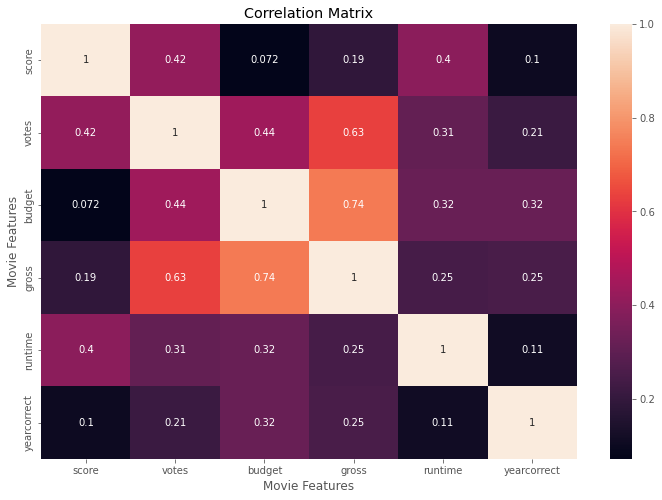

In [193]:
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

> We want to see the correlation between gross and company.
 * company in a object data type so we want to nurmalized it.
 

In [194]:
from sklearn.preprocessing import LabelEncoder

df_numeric = df.copy()
# create a LabelEncoder object
le = LabelEncoder()

# loop through each column
for column in df_numeric.columns:
    # check if the column is of object data type
    if df_numeric[column].dtype == 'object':
        # apply LabelEncoder to the column
        df_numeric[column] = le.fit_transform(df_numeric[column])

# print the encoded DataFrame
df_numeric.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
7445,517,5,0,176,8.4,903000.0,160,708,2107,53,356000000.0,2.797501e+09,1508,181.0,2019
7244,518,5,0,185,8.4,897000.0,160,708,2107,53,321000000.0,2.048360e+09,1508,149.0,2018
7075,4959,5,0,644,7.0,581000.0,2182,3382,494,53,317000000.0,1.332699e+09,2176,152.0,2017
7066,2884,5,0,2525,6.1,418000.0,2804,1900,206,53,300000000.0,6.579270e+08,2179,120.0,2017
5060,4096,5,0,2334,7.1,608000.0,955,3982,1242,53,300000000.0,9.609965e+08,2176,169.0,2007


In [195]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000.0,1.332699e+09,Walt Disney Pictures,152.0,2017
7066,Justice League,PG-13,Action,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0,2017
5060,Pirates of the Caribbean: at World's End,PG-13,Action,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000.0,9.609965e+08,Walt Disney Pictures,169.0,2007


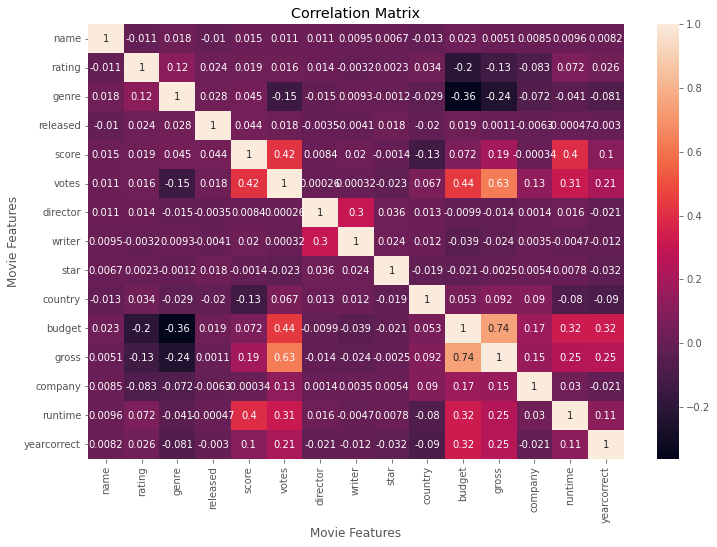

In [196]:
sns.heatmap(df_numeric.corr(), annot=True)
plt.title("Correlation Matrix")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show()

In [197]:
correlation_matrix = df_numeric.corr()
correlation_pairs = correlation_matrix.unstack()
sorted_pairs = correlation_pairs.sort_values()
high_corr = sorted_pairs[sorted_pairs>0.5]
high_corr
# at the end we votes and budget have a highest correlation to gross earning 
# company has no correlation

gross        votes          0.631110
votes        gross          0.631110
budget       gross          0.740247
gross        budget         0.740247
name         name           1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

## Let's see the relatoin between gross and other features

> Find the highest companies in terms of gross.

In [198]:
CompanyGrossSumSorted = df.groupby('company')[['gross']].sum().sort_values('gross', ascending = False)[:10].astype('int64')
CompanyGrossSumSorted

,gross
company,
Warner Bros.,56329179122
Universal Pictures,52514188890
Columbia Pictures,43008941346
Paramount Pictures,40493607415
Twentieth Century Fox,40257053857
Walt Disney Pictures,36327887792
New Line Cinema,19867862616
Marvel Studios,15065592411
DreamWorks Animation,11873612858


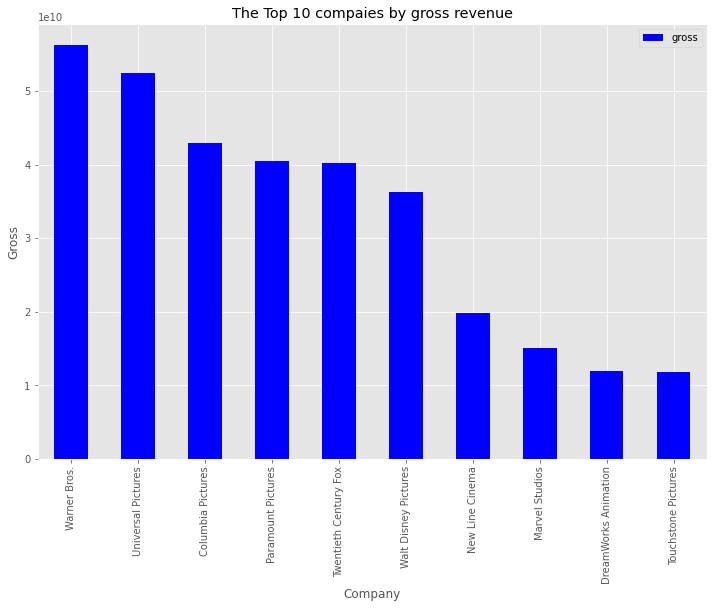

In [199]:
CompanyGrossSumSorted.plot(kind='bar',color='blue')
plt.xlabel('Company')
plt.ylabel('Gross')
plt.title('The Top 10 compaies by gross revenue')
plt.show()

> Find most popular genre by vote


In [200]:
GenreVotesSum = df.groupby('genre')[['votes']].sum()[:10]
GenreVotesSumSorted = GenreVotesSum.sort_values(by=['votes'], ascending=False).astype('int64')
GenreVotesSumSorted

,votes
genre,
Action,239245023
Comedy,121555435
Drama,104969454
Crime,49809463
Adventure,43093450
Animation,42883333
Biography,39956848
Horror,21814041
Fantasy,2556000


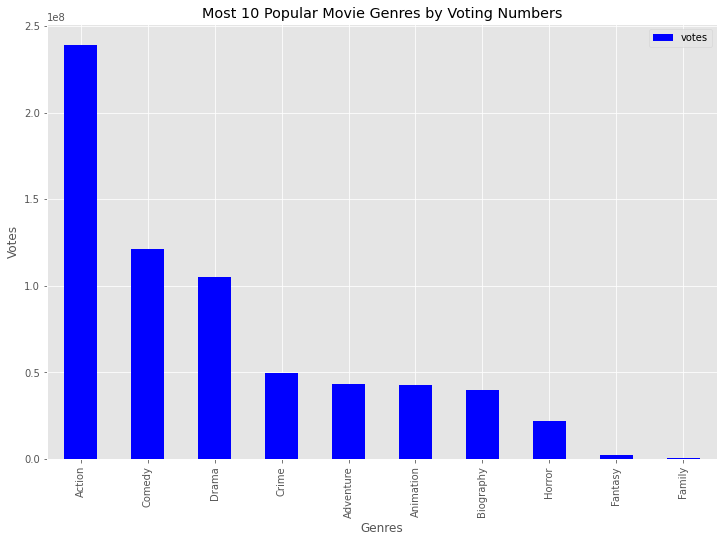

In [201]:
GenreVotesSumSorted.plot(kind='bar',color='blue')
plt.xlabel('Genres')
plt.ylabel('Votes') 
plt.title('Most 10 Popular Movie Genres by Voting Numbers')
plt.show()

* action is the most popular Movie Genres by Votes

> Find the highest genre in terms of gross

In [202]:
GenreGrossSum = df.groupby('genre')[['gross']].sum()[:10]
GenreGrossSumSorted = GenreGrossSum.sort_values(by=['gross'], ascending=False).astype('int64')
GenreGrossSumSorted

,gross
genre,
Action,242961063316
Comedy,97157381393
Animation,79889075108
Drama,56367018968
Adventure,45905109017
Crime,21314721317
Biography,20725825978
Horror,14542374576
Family,2157876476


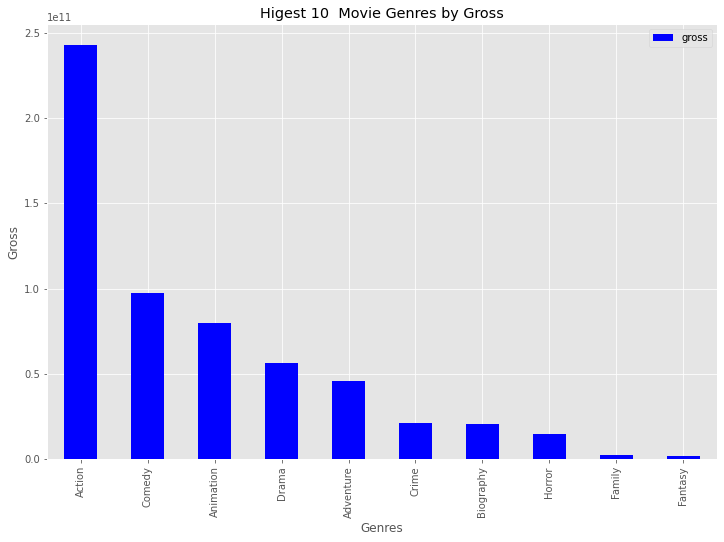

In [203]:
GenreGrossSumSorted.plot(kind='bar',color='blue')
plt.xlabel('Genres')
plt.ylabel('Gross') 
plt.title('Higest 10  Movie Genres by Gross')
plt.show()

* We noticed that Action is the highest in terms of voting and gross
* This means that views and popularity increase the percentage of gross

In [204]:
GenreScoreMean = df.groupby('genre')[['score']].mean()[:10]
GenreScoreMeanSorted = GenreScoreMean.sort_values(by=['score'], ascending=False)
GenreScoreMeanSorted

,score
genre,
Biography,7.042191
Animation,6.762236
Drama,6.695344
Crime,6.681157
Family,6.540000
Adventure,6.290453
Action,6.213205
Comedy,6.199083
Fantasy,6.050000


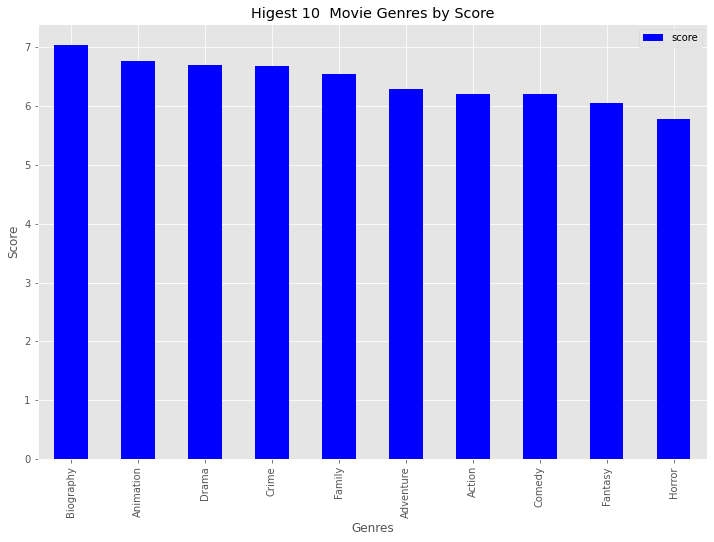

In [205]:
GenreScoreMeanSorted.plot(kind='bar',color='blue')
plt.xlabel('Genres')
plt.ylabel('Score') 
plt.title('Higest 10  Movie Genres by Score')
plt.show()

* we note that Biography genre has the hight score Although it is not the first in gross 
* So it is shown that popularity of a movie is important to increase the percentage of gross but doesn't necessarily make it highly rated one

In [206]:

df.columns

Index(['name', 'rating', 'genre', 'released', 'score', 'votes', 'director',
       'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime',
       'yearcorrect'],
      dtype='object')

In [207]:
GenreScoreMean = df.groupby('yearcorrect')[['gross']].sum()[:10]
GenreScoreMeanSorted = GenreScoreMean.sort_values(by=['gross'], ascending=False).astype("int64")
GenreScoreMeanSorted

,gross
yearcorrect,
1989,5953274593
1988,4817976594
1987,3993675698
1984,3629244476
1986,3597582290
1985,3561043458
1982,3429064844
1983,2701608218
1980,2329357746


In [208]:
GenreScoreMean = df.groupby('country')[['gross']].sum()[:10]
GenreScoreMeanSorted = GenreScoreMean.sort_values(by=['gross'], ascending=False).astype("int64")
GenreScoreMeanSorted

,gross
country,
China,7620670579
Canada,6073290516
Australia,3007403678
Argentina,136140596
Austria,104600423
Brazil,99047282
Belgium,40487992
Chile,39117029
Colombia,12594630


In [209]:
StarGrossSum = df.groupby('star')[['gross','budget']].sum()[:10]
StarGrossSumSorted = StarGrossSum.sort_values(by=['gross'], ascending=False).astype("int64")
StarGrossSumSorted

,gross,budget
star,,
Aamir Khan,520792731,7395080
Aaron Eckhart,413630294,206525000
Aaron Paul,209003118,66000000
A.J. Cook,90941129,26000000
50 Cent,46563961,40000000
Aaliyah,45479110,35000000
'Weird Al' Yankovic,6157157,5000000
Aaron Moorhead,956425,0
Aaron Pedersen,650352,0


In [210]:
DirectorGrossSum = df.groupby('director')[['gross','budget']].sum()[:10]
DirectorGrossSumSorted = DirectorGrossSum.sort_values(by=['gross'], ascending=False).astype("int64")
DirectorGrossSumSorted

,gross,budget
director,,
Aaron Blaise,250397798,128000000
Abby Kohn,94539426,32000000
Aaron Seltzer,85749034,20000000
Aaron Sorkin,59284015,30000000
Aaron Norris,41169421,6000000
A.R. Murugadoss,38316584,0
Aamir Khan,21897373,0
Abdellatif Kechiche,19465835,0
Abbas Kiarostami,8569943,0


In [211]:
WriterGrossSum = df.groupby('writer')[['gross','budget']].sum()[:10]
WriterGrossSumSorted = WriterGrossSum.sort_values(by=['gross'], ascending=False).astype("int64")
WriterGrossSumSorted

,gross,budget
writer,,
A.A. Milne,197744377,75000000
A.J. Quinnell,131354448,70000000
A.E.W. Mason,29882645,35000000
A.B. 'Banjo' Paterson,20659423,3500000
A.S. Byatt,18230199,29997987
AJ Carothers,15934737,0
A L Katz,6980986,900000
'Weird Al' Yankovic,6157157,5000000
Aaron Butler,6149983,1250000


In [212]:
CountryGrossSum = df.groupby('country')[['gross','budget']].sum()[:10]
CountryGrossSumSumSorted = CountryGrossSum.sort_values(by=['gross'], ascending=False).astype("int64")
CountryGrossSumSumSorted

,gross,budget
country,,
China,7620670579,1846400000
Canada,6073290516,2542177000
Australia,3007403678,1080950000
Argentina,136140596,6800000
Austria,104600423,38900000
Brazil,99047282,31900000
Belgium,40487992,108100000
Chile,39117029,26000000
Colombia,12594630,3000000
